In [0]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import LSTM
from prettytable import PrettyTable

In [3]:
import os
print(os.getcwd())

/content


In [17]:
table = PrettyTable()
table.field_names = ["layer of Lstm", "Accuracy"]
print(table)

+---------------+----------+
| layer of Lstm | Accuracy |
+---------------+----------+
+---------------+----------+


In [4]:
df2 = pd.read_pickle("./file_name.pkl")
df2.shape

(50000, 2)

In [5]:
df2.head()

,text,score
0,witti littl book make son laugh loud recit car...,1
1,rememb see show air televis year ago child sis...,1
2,beetlejuic well written movi everyth excel act...,1
3,twist rumplestiskin captur film star michael k...,1
4,beetlejuic excel funni movi keaton hilari wack...,1


In [0]:
x = df2.text
y = df2.score

In [0]:
xTrain = x[0:40000]
yTrain = y[0:40000]
xTest = x[40000:50000]
yTest = y[40000:50000]


In [8]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(xTrain)

xTrain = tokenizer.texts_to_sequences(xTrain)
xTest = tokenizer.texts_to_sequences(xTest)
print(len(xTrain))
print(len(xTrain[0]))

xTrain[0]

40000
29


[29,
 782,
 12,
 318,
 2072,
 3346,
 1122,
 1196,
 532,
 106,
 2748,
 962,
 825,
 1551,
 8,
 187,
 752,
 782,
 872,
 2749,
 1015,
 782,
 1591,
 1754,
 318,
 101,
 253,
 1165,
 1405]

In [9]:
# truncate and/or pad input sequences
max_review_length = 600
X_train = sequence.pad_sequences(xTrain, maxlen=max_review_length)
X_test = sequence.pad_sequences(xTest, maxlen=max_review_length)

print(X_train.shape)
print(X_train[1])

(40000, 600)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

# Single Layer LSTM

In [22]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(5000, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 600, 32)           160000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
history = model.fit(X_train, yTrain, batch_size=64, epochs=5, verbose=1, validation_data=(X_test, yTest))


Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 736s 18ms/step - loss: 0.2420 - acc: 0.9141 - val_loss: 0.2174 - val_acc: 0.9182
Epoch 2/5
40000/40000 [==============================] - 734s 18ms/step - loss: 0.1624 - acc: 0.9411 - val_loss: 0.2073 - val_acc: 0.9232
Epoch 3/5
40000/40000 [==============================] - 733s 18ms/step - loss: 0.1397 - acc: 0.9501 - val_loss: 0.2179 - val_acc: 0.9176
Epoch 4/5
40000/40000 [==============================] - 734s 18ms/step - loss: 0.1245 - acc: 0.9558 - val_loss: 0.2302 - val_acc: 0.9193
Epoch 5/5
36608/40000 [==========================>...] - ETA: 56s - loss: 0.1111 - acc: 0.9631Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 736s 18ms/step - loss: 0.2420 - acc: 0.9141 - val_loss: 0.2174 - val_acc: 0.9182
Epoch 2/5
40000/40000 [==============================] - 734s 18ms/step - loss: 0.1624 - acc: 0.9411 - val_loss: 0.2

In [18]:
score = model.evaluate(X_test, yTest, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,6))
vy = history.history['val_loss']
ty = history.history['loss']

Test score: 0.2447469062358141
Test accuracy: 0.9184


In [0]:
table.add_row(["1", 91.84])

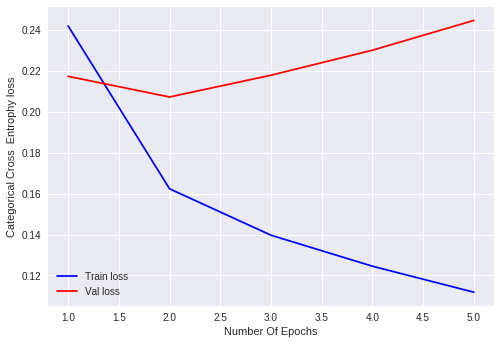

In [20]:
import matplotlib.pyplot as plt

plt.plot(x, ty, 'b', label= 'Train loss')
plt.plot(x, vy, 'r', label= 'Val loss')
plt.legend()
plt.xlabel("Number Of Epochs")
plt.ylabel("Categorical Cross  Entrophy loss")
plt.show()


# Observation :- 
At epoch 2 we find that there is increase in cv loss while there is decrease in train loss
so we are actually overfitting the model

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 741s 19ms/step - loss: 0.2474 - acc: 0.9112 - val_loss: 0.2093 - val_acc: 0.9205
Epoch 2/2
40000/40000 [==============================] - 738s 18ms/step - loss: 0.1673 - acc: 0.9362 - val_loss: 0.2071 - val_acc: 0.9230
Test score: 0.20710074213147164
Test accuracy: 0.923


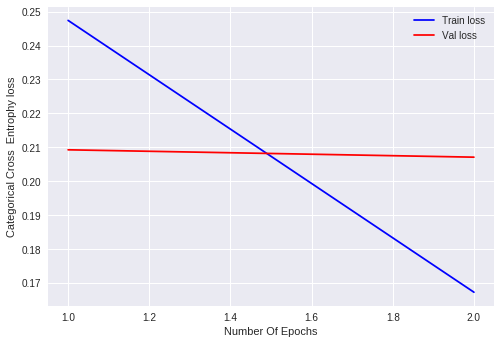

In [23]:
# re running the model with 2 epochs to avoid overfitting 
history = model.fit(X_train, yTrain, batch_size=64, epochs=2, verbose=1, validation_data=(X_test, yTest))

score = model.evaluate(X_test, yTest, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,3))
vy = history.history['val_loss']
ty = history.history['loss']

plt.plot(x, ty, 'b', label= 'Train loss')
plt.plot(x, vy, 'r', label= 'Val loss')
plt.legend()
plt.xlabel("Number Of Epochs")
plt.ylabel("Categorical Cross  Entrophy loss")
plt.show()



# Two layer LSTM

In [10]:
# create the model
embedding_vecor_length = 32
model1 = Sequential()
model1.add(Embedding(5000, embedding_vecor_length, input_length=max_review_length))
model1.add(LSTM(100, return_sequences=True))
# for reference how to use two layer lstm https://github.com/keras-team/keras/issues/3522
model1.add(LSTM(100))

model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 600, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 600, 100)          53200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 293,701
Trainable params: 293,701
Non-trainable params: 0
_______________

In [11]:
history1 = model1.fit(X_train, yTrain, batch_size=64, epochs=5, verbose=1, validation_data=(X_test, yTest))


Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 1551s 39ms/step - loss: 0.2372 - acc: 0.9155 - val_loss: 0.2157 - val_acc: 0.9205
Epoch 2/5
40000/40000 [==============================] - 1554s 39ms/step - loss: 0.1610 - acc: 0.9411 - val_loss: 0.2459 - val_acc: 0.9184
Epoch 3/5
40000/40000 [==============================] - 1549s 39ms/step - loss: 0.1426 - acc: 0.9493 - val_loss: 0.2396 - val_acc: 0.9208
Epoch 4/5
40000/40000 [==============================] - 1555s 39ms/step - loss: 0.1221 - acc: 0.9576 - val_loss: 0.2244 - val_acc: 0.9188
Epoch 5/5
40000/40000 [==============================] - 1554s 39ms/step - loss: 0.1049 - acc: 0.9651 - val_loss: 0.2516 - val_acc: 0.9160


In [14]:
score = model1.evaluate(X_test, yTest, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
x = list(range(1,6))
vy = history1.history['val_loss']
ty = history1.history['loss']

Test score: 0.2516394125878811
Test accuracy: 0.916


In [0]:
table.add_row(["2", "91.6"])

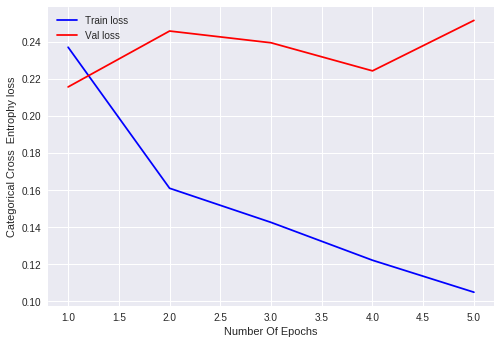

In [15]:

import matplotlib.pyplot as plt

plt.plot(x, ty, 'b', label= 'Train loss')
plt.plot(x, vy, 'r', label= 'Val loss')
plt.legend()
plt.xlabel("Number Of Epochs")
plt.ylabel("Categorical Cross  Entrophy loss")
plt.show()

# Observation
Nothing can be concluded as there is frequently up and down in the cv data we might come to an conclusion if we let it run for more epochs

In [20]:
print(table)

+---------------+----------+
| layer of Lstm | Accuracy |
+---------------+----------+
|       1       |  91.84   |
|       2       |   91.6   |
+---------------+----------+


# Conclusions
1. **Single layer LSTM ** model has been fitted perfectly within 2 epochs
2. **Double layer LSTM** model need to run for more epochs as there is frequently change in cv loss